# Train

In [7]:
import pandas as pd
from sklearn import datasets

In [5]:
data = pd.read_csv("C:/Users/pirl/Desktop/ML_GUI/ML_GUI/dataset/iris/iris.csv")

In [6]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
print(X_r)

from sklearn import cluster
model = cluster.KMeans(init='k-means++', n_clusters=3)
model.fit(X_r,Y)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
Y_predict = model.predict(X_r)
print(Y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [25]:
pred = pd.DataFrame(Y_predict)
pred.columns = ['pred']
feature = pd.DataFrame(X_r)
p = pd.concat([feature, pred], axis=1)
p.columns = ['f1', 'f2', 'pred']
print(p)

           f1        f2  pred
0   -2.684126  0.319397     1
1   -2.714142 -0.177001     1
2   -2.888991 -0.144949     1
3   -2.745343 -0.318299     1
4   -2.728717  0.326755     1
..        ...       ...   ...
145  1.944110  0.187532     2
146  1.527167 -0.375317     0
147  1.764346  0.078859     2
148  1.900942  0.116628     2
149  1.390189 -0.282661     0

[150 rows x 3 columns]


In [26]:
centers = pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2'])
center_x = centers['f1']
center_y = centers['f2']

Text(0.5, 1.0, 'Clustering result')

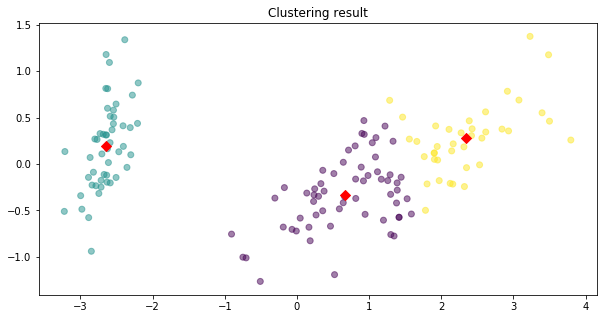

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(p['f1'], p['f2'], c=p['pred'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.title('Clustering result')

In [38]:
import os
import time
import pickle
time_stamp = time.strftime("%Y%m%d_%H%M%S", time.localtime((time.time())))[2:]
file_name = 'km_model_' + time_stamp + '.sav'
pickle.dump(model, open(os.path.join(save_directory, file_name), 'wb'))

# Test

In [43]:
model2 = pickle.load(open("C:/Users/pirl/Desktop/km_model_200410_152803.sav", 'rb'))

In [44]:
data = pd.read_csv("C:/Users/pirl/Desktop/ML_GUI/ML_GUI/dataset/iris/iris.csv")
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [45]:
Y_predict = model2.predict(X_r)

Text(0.5, 1.0, 'Clustering result')

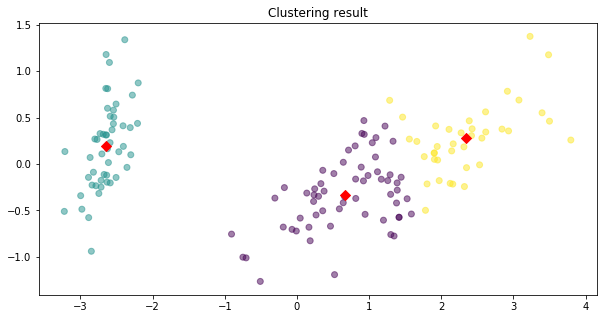

In [46]:
pred = pd.DataFrame(Y_predict)
pred.columns = ['pred']
feature = pd.DataFrame(X_r)
p = pd.concat([feature, pred], axis=1)
p.columns = ['f1', 'f2', 'pred']

centers = pd.DataFrame(model.cluster_centers_, columns=['f1', 'f2'])
center_x = centers['f1']
center_y = centers['f2']

plt.figure(figsize=(10, 5))
plt.scatter(p['f1'], p['f2'], c=p['pred'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.title('Clustering result')